<a href="https://colab.research.google.com/github/farrelakhdan/Kelompok4_UAS_Pembelajaran_Mesin/blob/main/Kelompok4_UAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

SOAL NO 1 PENGAMBILAN DATA DARI COLEGMENFES

In [127]:
!git clone --depth=1 https://github.com/twintproject/twint.git
!cd /content/twint && pip3 install . -r requirements.txt
!pip install aiohttp==3.7.0
!pip install nest_asyncio

fatal: destination path 'twint' already exists and is not an empty directory.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Processing /content/twint
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
  Created wheel for twint: filename=twint-2.1.21-py3-none-any.whl size=38870 sha256=30c96b537ad5cf594386200bfe0ef80aeca09746851edb938df9054677f1fea9
  Stored in directory: /tmp/pip-ephem-wheel-cache-r0qzpdin/wheels/a9/70/09/93062f64eee119ab310a33bae425d98678f627d1dc1b667e8f
Successfully built twint
  Attempting uninstall: twint
    Found existing installation: twint 2.1.21
    Uninstalling twint-2.

In [128]:

import twint
import nest_asyncio
nest_asyncio.apply()
import time
import pandas as pd
import os
import re
from textblob import TextBlob
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

timestr = time.strftime("%Y%m%d")
#configuration
c = twint.Config()
c.Since = "2022-12-17"
c.Until = "2022-12-23"   
c.Limit = 5000    
c.Username = "collegemenfess"   
c.Lang = "en"        # Language
c.Store_csv = True
c.Output = timestr + "_user.csv"
twint.run.Search(c)

1606077069070594048 2022-12-22 23:59:47 +0000 <collegemenfess> [cm] temenku yg minggu kemaren bimbingan bareng udh pada ngumpulin revisian, aku masih muter-muter baca jurnal:)  https://t.co/JCMTJXTEGC
1606076218700283904 2022-12-22 23:56:24 +0000 <collegemenfess> [cm] hii gaes saran film yg bagus atau setelah nnt film tsb bkin kita ada efeknya ke prilaku kita dong!! bebas film indo/kor/ing. soalnya sender dpt tugas kuliah utk mereview film. thankyou
1606075685591994368 2022-12-22 23:54:17 +0000 <collegemenfess> [cm] menurut kalian matkul ALK susuh ga si guys😭😭😭
1606075664209100801 2022-12-22 23:54:12 +0000 <collegemenfess> [cm] aku ada tugas proposal skripsi di matkul metopen. penulisan yg benar untuk di judul itu yg mana ya? Makasihhhh banyak  https://t.co/vQfyrqj15O
1606075553177817088 2022-12-22 23:53:45 +0000 <collegemenfess> [cm] Kalian yg lagi mengerjakan tugas akhir spt skripswit menggunakan keyboard eksternal atau cukup pakai keyboard dr laptop?
1606075040797462528 2022-12-22 2

In [129]:
df = pd.read_csv('20221228_user.csv')
df

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1606077069070594048,1606077069070594048,2022-12-22 23:59:47 UTC,2022-12-22,23:59:47,0,1046084008742801408,collegemenfess,COLLE | CEK PINNED😎,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
1,1606076218700283904,1606076218700283904,2022-12-22 23:56:24 UTC,2022-12-22,23:56:24,0,1046084008742801408,collegemenfess,COLLE | CEK PINNED😎,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2,1606075685591994368,1606075685591994368,2022-12-22 23:54:17 UTC,2022-12-22,23:54:17,0,1046084008742801408,collegemenfess,COLLE | CEK PINNED😎,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
3,1606075664209100801,1606075664209100801,2022-12-22 23:54:12 UTC,2022-12-22,23:54:12,0,1046084008742801408,collegemenfess,COLLE | CEK PINNED😎,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
4,1606075553177817088,1606075553177817088,2022-12-22 23:53:45 UTC,2022-12-22,23:53:45,0,1046084008742801408,collegemenfess,COLLE | CEK PINNED😎,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,1604615153412034561,1604615153412034561,2022-12-18 23:10:39 UTC,2022-12-18,23:10:39,0,1046084008742801408,collegemenfess,COLLE | CEK PINNED😎,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
24996,1604614228408958976,1604614227267682304,2022-12-18 23:06:59 UTC,2022-12-18,23:06:59,0,1046084008742801408,collegemenfess,COLLE | CEK PINNED😎,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
24997,1604614227267682304,1604614227267682304,2022-12-18 23:06:58 UTC,2022-12-18,23:06:58,0,1046084008742801408,collegemenfess,COLLE | CEK PINNED😎,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
24998,1604613676723732480,1604613676723732480,2022-12-18 23:04:47 UTC,2022-12-18,23:04:47,0,1046084008742801408,collegemenfess,COLLE | CEK PINNED😎,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN


Pengecekan Null

In [130]:
df.isnull().sum()

id                     0
conversation_id        0
created_at             0
date                   0
time                   0
timezone               0
user_id                0
username               0
name                   0
place              25000
tweet                  0
language               0
mentions               0
urls                   0
photos                 0
replies_count          0
retweets_count         0
likes_count            0
hashtags               0
cashtags               0
link                   0
retweet                0
quote_url          24680
video                  0
thumbnail          18445
near               25000
geo                25000
source             25000
user_rt_id         25000
user_rt            25000
retweet_id         25000
reply_to               0
retweet_date       25000
translate          25000
trans_src          25000
trans_dest         25000
dtype: int64

Pemilihan Data / Seleksi Fitur

In [131]:
df = df.drop(df.iloc[:,11:], axis=1) 
df = df.drop(df.iloc[:,1:10], axis=1)
df.head()

,id,tweet
0,1606077069070594048,[cm] temenku yg minggu kemaren bimbingan baren...
1,1606076218700283904,[cm] hii gaes saran film yg bagus atau setelah...
2,1606075685591994368,[cm] menurut kalian matkul ALK susuh ga si guy...
3,1606075664209100801,[cm] aku ada tugas proposal skripsi di matkul ...
4,1606075553177817088,[cm] Kalian yg lagi mengerjakan tugas akhir sp...


Fungsi untuk bersih-bersih data

In [132]:
def clean_lower(lwr):
    lwr = lwr.lower()
    return lwr

clean_spcl = re.compile('[/(){}\[\]\|@,;][c][m]')
clean_symbol = re.compile('[^0-9a-z]')
def clean_punct(text):
    text = clean_spcl.sub('', text)
    text = clean_symbol.sub(' ', text)
    return text  

def _normalize_whitespace(text):
    corrected = str(text)
    corrected = re.sub(r"//t",r"\t", corrected)
    corrected = re.sub(r"( )\1+",r"\1", corrected)
    corrected = re.sub(r"(\n)\1+",r"\1", corrected)
    corrected = re.sub(r"(\r)\1+",r"\1", corrected)
    corrected = re.sub(r"(\t)\1+",r"\1", corrected)
    return corrected.strip(" ")

Pembersihan Data

In [133]:
df['hasil_bersih'] = df['tweet'].apply(clean_lower).apply(clean_punct).apply(_normalize_whitespace)

df.head()

,id,tweet,hasil_bersih
0,1606077069070594048,[cm] temenku yg minggu kemaren bimbingan baren...,temenku yg minggu kemaren bimbingan bareng udh...
1,1606076218700283904,[cm] hii gaes saran film yg bagus atau setelah...,hii gaes saran film yg bagus atau setelah nnt ...
2,1606075685591994368,[cm] menurut kalian matkul ALK susuh ga si guy...,menurut kalian matkul alk susuh ga si guys
3,1606075664209100801,[cm] aku ada tugas proposal skripsi di matkul ...,aku ada tugas proposal skripsi di matkul metop...
4,1606075553177817088,[cm] Kalian yg lagi mengerjakan tugas akhir sp...,kalian yg lagi mengerjakan tugas akhir spt skr...


In [134]:
df

,id,tweet,hasil_bersih
0,1606077069070594048,[cm] temenku yg minggu kemaren bimbingan baren...,temenku yg minggu kemaren bimbingan bareng udh...
1,1606076218700283904,[cm] hii gaes saran film yg bagus atau setelah...,hii gaes saran film yg bagus atau setelah nnt ...
2,1606075685591994368,[cm] menurut kalian matkul ALK susuh ga si guy...,menurut kalian matkul alk susuh ga si guys
3,1606075664209100801,[cm] aku ada tugas proposal skripsi di matkul ...,aku ada tugas proposal skripsi di matkul metop...
4,1606075553177817088,[cm] Kalian yg lagi mengerjakan tugas akhir sp...,kalian yg lagi mengerjakan tugas akhir spt skr...
...,...,...,...
24995,1604615153412034561,"[cm] selamat pagi, semoga hari senin nya cerah...",selamat pagi semoga hari senin nya cerah seman...
24996,1604614228408958976,"sendiri. doain jg spy cpt dpt parttime nnti, m...",sendiri doain jg spy cpt dpt parttime nnti mak...
24997,1604614227267682304,[Cm] hari ini aku mau berangkat ngekos utk bim...,hari ini aku mau berangkat ngekos utk bimbinga...
24998,1604613676723732480,YANG UAS HARI INI COBA ABSEN ☝🏻 [CM],yang uas hari ini coba absen


SOAL NO 2

In [135]:
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity


def getPolarity(text):
    return TextBlob(text).sentiment.polarity


df['Subjectivity'] = df['hasil_bersih'].apply(getSubjectivity)
df['Polarity'] = df['hasil_bersih'].apply(getPolarity)


df.head()

,id,tweet,hasil_bersih,Subjectivity,Polarity
0,1606077069070594048,[cm] temenku yg minggu kemaren bimbingan baren...,temenku yg minggu kemaren bimbingan bareng udh...,0.0,0.0
1,1606076218700283904,[cm] hii gaes saran film yg bagus atau setelah...,hii gaes saran film yg bagus atau setelah nnt ...,0.0,0.0
2,1606075685591994368,[cm] menurut kalian matkul ALK susuh ga si guy...,menurut kalian matkul alk susuh ga si guys,0.0,0.0
3,1606075664209100801,[cm] aku ada tugas proposal skripsi di matkul ...,aku ada tugas proposal skripsi di matkul metop...,0.0,0.0
4,1606075553177817088,[cm] Kalian yg lagi mengerjakan tugas akhir sp...,kalian yg lagi mengerjakan tugas akhir spt skr...,0.0,0.0


In [136]:
def getSentiment(score):
    if score < 0 :
        return 'Negative'
    elif score == 0 :
        return 'Netral'
    else :
        return 'Positive'
 
df['Sentiment'] = df['Polarity'].apply(getSentiment)

df.head()

,id,tweet,hasil_bersih,Subjectivity,Polarity,Sentiment
0,1606077069070594048,[cm] temenku yg minggu kemaren bimbingan baren...,temenku yg minggu kemaren bimbingan bareng udh...,0.0,0.0,Netral
1,1606076218700283904,[cm] hii gaes saran film yg bagus atau setelah...,hii gaes saran film yg bagus atau setelah nnt ...,0.0,0.0,Netral
2,1606075685591994368,[cm] menurut kalian matkul ALK susuh ga si guy...,menurut kalian matkul alk susuh ga si guys,0.0,0.0,Netral
3,1606075664209100801,[cm] aku ada tugas proposal skripsi di matkul ...,aku ada tugas proposal skripsi di matkul metop...,0.0,0.0,Netral
4,1606075553177817088,[cm] Kalian yg lagi mengerjakan tugas akhir sp...,kalian yg lagi mengerjakan tugas akhir spt skr...,0.0,0.0,Netral


In [137]:
# Cek Jumlah Data Per Kelas
print(df['Sentiment'])

0        Netral
1        Netral
2        Netral
3        Netral
4        Netral
          ...  
24995    Netral
24996    Netral
24997    Netral
24998    Netral
24999    Netral
Name: Sentiment, Length: 25000, dtype: object


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


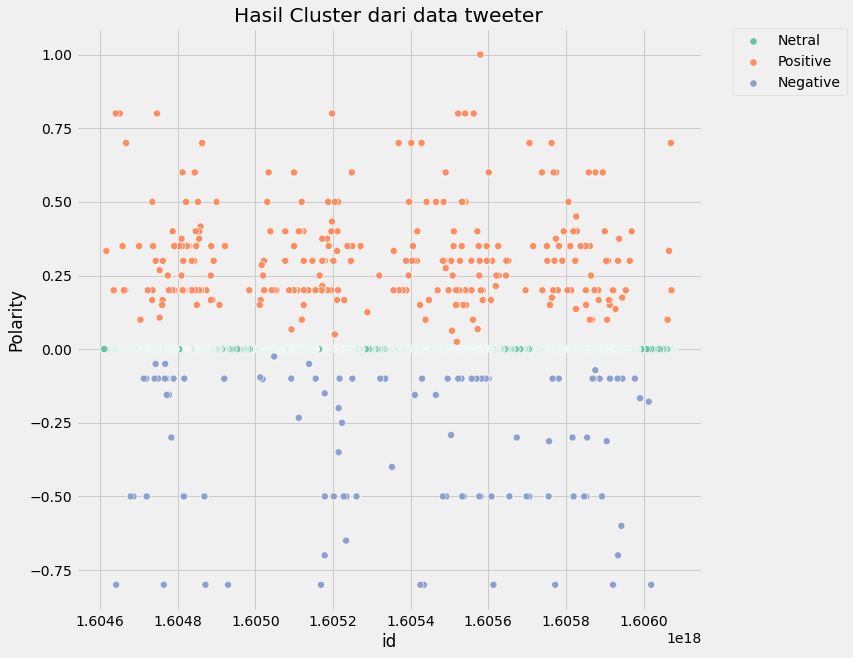

In [138]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(10, 10))

scat = sns.scatterplot(
   df['id'],
    df['Polarity'],
    s=50,
    data=df,
    hue=df['Sentiment'],
    palette="Set2",
)

scat.set_title(
    "Hasil Cluster dari data tweeter"
 )
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

plt.show()

SOAL NO 3 PROSES LABELING

In [139]:
encode = LabelEncoder()
content = encode.fit_transform(df['Sentiment'])
df['Label_Sentiment']  = pd.DataFrame(content)
df.head()

,id,tweet,hasil_bersih,Subjectivity,Polarity,Sentiment,Label_Sentiment
0,1606077069070594048,[cm] temenku yg minggu kemaren bimbingan baren...,temenku yg minggu kemaren bimbingan bareng udh...,0.0,0.0,Netral,1
1,1606076218700283904,[cm] hii gaes saran film yg bagus atau setelah...,hii gaes saran film yg bagus atau setelah nnt ...,0.0,0.0,Netral,1
2,1606075685591994368,[cm] menurut kalian matkul ALK susuh ga si guy...,menurut kalian matkul alk susuh ga si guys,0.0,0.0,Netral,1
3,1606075664209100801,[cm] aku ada tugas proposal skripsi di matkul ...,aku ada tugas proposal skripsi di matkul metop...,0.0,0.0,Netral,1
4,1606075553177817088,[cm] Kalian yg lagi mengerjakan tugas akhir sp...,kalian yg lagi mengerjakan tugas akhir spt skr...,0.0,0.0,Netral,1


SOAL NO 4 MODEL KLASIFIKASI DENGAN 3 MODEL

In [140]:
X = df['hasil_bersih'].values
y = df['Label_Sentiment'].values

In [141]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

In [142]:
bow = TfidfVectorizer(stop_words='english')

X_train = bow.fit_transform(X_train)

X_test = bow.transform(X_test)

RANDOM FOREST

In [143]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rdf_model = RandomForestClassifier().fit(X_train, y_train)

y_pred_train = rdf_model.predict(X_train)

acc_train = accuracy_score(y_train, y_pred_train)

y_pred_test = rdf_model.predict(X_test)

acc_test = accuracy_score(y_test, y_pred_test)

print(f'Hasil akurasi data train: {acc_train}')
print(f'Hasil akurasi data test: {acc_test}')

Hasil akurasi data train: 1.0
Hasil akurasi data test: 1.0


In [144]:
# Evaluasi Matrik
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        89
           1       1.00      1.00      1.00      4627
           2       1.00      1.00      1.00       284

    accuracy                           1.00      5000
   macro avg       1.00      1.00      1.00      5000
weighted avg       1.00      1.00      1.00      5000



NAIVE BAYES

In [145]:
from sklearn.naive_bayes import MultinomialNB 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 

mnb = MultinomialNB()

mnb.fit(X_train, y_train)

y_train_pred = mnb.predict(X_train)

acc_train = accuracy_score(y_train, y_train_pred)

y_test_pred = mnb.predict(X_test)

acc_test = accuracy_score(y_test, y_test_pred)

print(f'Hasil akurasi data train: {acc_train}')
print(f'Hasil akurasi data test: {acc_test}')

Hasil akurasi data train: 0.9372
Hasil akurasi data test: 0.9342


In [146]:
# Evaluasi Matrik
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.07      0.13        89
           1       0.93      1.00      0.97      4627
           2       1.00      0.13      0.24       284

    accuracy                           0.93      5000
   macro avg       0.98      0.40      0.44      5000
weighted avg       0.94      0.93      0.91      5000



DECISION TREE

In [147]:
from sklearn.tree import DecisionTreeClassifier

dt_entropy = DecisionTreeClassifier(max_depth=8, criterion='entropy', random_state=5)

dt_entropy.fit(X_train, y_train)

dt_gini = DecisionTreeClassifier(max_depth=8, criterion='gini', random_state=5)
dt_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8, random_state=5)

In [148]:
y_pred_entropy = dt_entropy.predict(X_test)
y_pred_gini = dt_gini.predict(X_test)

accuracy_entropy = accuracy_score(y_test, y_pred_entropy)
accuracy_gini = accuracy_score(y_test, y_pred_gini)

print("Accuracy achieved by using entropy: ", accuracy_entropy)

print("Accuracy achieved by using gini: ", accuracy_gini)

Accuracy achieved by using entropy:  0.9584
Accuracy achieved by using gini:  0.9584


In [149]:
# Evaluasi Matrik
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_gini))

              precision    recall  f1-score   support

           0       1.00      0.40      0.58        89
           1       0.96      1.00      0.98      4627
           2       1.00      0.45      0.62       284

    accuracy                           0.96      5000
   macro avg       0.99      0.62      0.73      5000
weighted avg       0.96      0.96      0.95      5000



SOAL NO 5 DENGAN DATA 500

In [150]:
# Mengambil Data Baru
timestr = time.strftime("%Y%m%d")
#configuration
c = twint.Config()
c.Since = "2022-12-17"
c.Until = "2022-12-23"    
c.Limit = 500    
c.Username = "collegemenfess"   
c.Lang = "en"        # Language
c.Store_csv = True
c.Output = timestr + "_user_baru.csv"
twint.run.Search(c)

1606077069070594048 2022-12-22 23:59:47 +0000 <collegemenfess> [cm] temenku yg minggu kemaren bimbingan bareng udh pada ngumpulin revisian, aku masih muter-muter baca jurnal:)  https://t.co/JCMTJXTEGC
1606076218700283904 2022-12-22 23:56:24 +0000 <collegemenfess> [cm] hii gaes saran film yg bagus atau setelah nnt film tsb bkin kita ada efeknya ke prilaku kita dong!! bebas film indo/kor/ing. soalnya sender dpt tugas kuliah utk mereview film. thankyou
1606075685591994368 2022-12-22 23:54:17 +0000 <collegemenfess> [cm] menurut kalian matkul ALK susuh ga si guys😭😭😭
1606075664209100801 2022-12-22 23:54:12 +0000 <collegemenfess> [cm] aku ada tugas proposal skripsi di matkul metopen. penulisan yg benar untuk di judul itu yg mana ya? Makasihhhh banyak  https://t.co/vQfyrqj15O
1606075553177817088 2022-12-22 23:53:45 +0000 <collegemenfess> [cm] Kalian yg lagi mengerjakan tugas akhir spt skripswit menggunakan keyboard eksternal atau cukup pakai keyboard dr laptop?
1606075040797462528 2022-12-22 2

In [151]:
df = pd.read_csv('20221228_user_baru.csv')
df

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1606077069070594048,1606077069070594048,2022-12-22 23:59:47 UTC,2022-12-22,23:59:47,0,1046084008742801408,collegemenfess,COLLE | CEK PINNED😎,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
1,1606076218700283904,1606076218700283904,2022-12-22 23:56:24 UTC,2022-12-22,23:56:24,0,1046084008742801408,collegemenfess,COLLE | CEK PINNED😎,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2,1606075685591994368,1606075685591994368,2022-12-22 23:54:17 UTC,2022-12-22,23:54:17,0,1046084008742801408,collegemenfess,COLLE | CEK PINNED😎,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
3,1606075664209100801,1606075664209100801,2022-12-22 23:54:12 UTC,2022-12-22,23:54:12,0,1046084008742801408,collegemenfess,COLLE | CEK PINNED😎,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
4,1606075553177817088,1606075553177817088,2022-12-22 23:53:45 UTC,2022-12-22,23:53:45,0,1046084008742801408,collegemenfess,COLLE | CEK PINNED😎,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,1605889510792757248,1605889510792757248,2022-12-22 11:34:30 UTC,2022-12-22,11:34:30,0,1046084008742801408,collegemenfess,COLLE | CEK PINNED😎,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
1496,1605889506053304320,1605889506053304320,2022-12-22 11:34:28 UTC,2022-12-22,11:34:28,0,1046084008742801408,collegemenfess,COLLE | CEK PINNED😎,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
1497,1605889478681251843,1605889478681251843,2022-12-22 11:34:22 UTC,2022-12-22,11:34:22,0,1046084008742801408,collegemenfess,COLLE | CEK PINNED😎,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
1498,1605889478601895936,1605889478601895936,2022-12-22 11:34:22 UTC,2022-12-22,11:34:22,0,1046084008742801408,collegemenfess,COLLE | CEK PINNED😎,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN


In [152]:
df.isnull().sum()

id                    0
conversation_id       0
created_at            0
date                  0
time                  0
timezone              0
user_id               0
username              0
name                  0
place              1500
tweet                 0
language              0
mentions              0
urls                  0
photos                0
replies_count         0
retweets_count        0
likes_count           0
hashtags              0
cashtags              0
link                  0
retweet               0
quote_url          1494
video                 0
thumbnail          1092
near               1500
geo                1500
source             1500
user_rt_id         1500
user_rt            1500
retweet_id         1500
reply_to              0
retweet_date       1500
translate          1500
trans_src          1500
trans_dest         1500
dtype: int64

In [153]:
df = df.drop(df.iloc[:,11:], axis=1) 
df = df.drop(df.iloc[:,1:10], axis=1)
df.head()
def clean_lower(lwr):
    lwr = lwr.lower()
    return lwr

clean_spcl = re.compile('[/(){}\[\]\|@,;][c][m]')
clean_symbol = re.compile('[^0-9a-z]')
def clean_punct(text):
    text = clean_spcl.sub('', text)
    text = clean_symbol.sub(' ', text)
    return text  

def _normalize_whitespace(text):
    corrected = str(text)
    corrected = re.sub(r"//t",r"\t", corrected)
    corrected = re.sub(r"( )\1+",r"\1", corrected)
    corrected = re.sub(r"(\n)\1+",r"\1", corrected)
    corrected = re.sub(r"(\r)\1+",r"\1", corrected)
    corrected = re.sub(r"(\t)\1+",r"\1", corrected)
    return corrected.strip(" ")

In [154]:
df['hasil_bersih'] = df['tweet'].apply(clean_lower).apply(clean_punct).apply(_normalize_whitespace)

df.head()

,id,tweet,hasil_bersih
0,1606077069070594048,[cm] temenku yg minggu kemaren bimbingan baren...,temenku yg minggu kemaren bimbingan bareng udh...
1,1606076218700283904,[cm] hii gaes saran film yg bagus atau setelah...,hii gaes saran film yg bagus atau setelah nnt ...
2,1606075685591994368,[cm] menurut kalian matkul ALK susuh ga si guy...,menurut kalian matkul alk susuh ga si guys
3,1606075664209100801,[cm] aku ada tugas proposal skripsi di matkul ...,aku ada tugas proposal skripsi di matkul metop...
4,1606075553177817088,[cm] Kalian yg lagi mengerjakan tugas akhir sp...,kalian yg lagi mengerjakan tugas akhir spt skr...


In [155]:
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity


def getPolarity(text):
    return TextBlob(text).sentiment.polarity


df['Subjectivity'] = df['hasil_bersih'].apply(getSubjectivity)
df['Polarity'] = df['hasil_bersih'].apply(getPolarity)


df.head()
def getSentiment(score):
    if score < 0 :
        return 'Negative'
    elif score == 0 :
        return 'Netral'
    else :
        return 'Positive'
 
df['Sentiment'] = df['Polarity'].apply(getSentiment)

df.head()

,id,tweet,hasil_bersih,Subjectivity,Polarity,Sentiment
0,1606077069070594048,[cm] temenku yg minggu kemaren bimbingan baren...,temenku yg minggu kemaren bimbingan bareng udh...,0.0,0.0,Netral
1,1606076218700283904,[cm] hii gaes saran film yg bagus atau setelah...,hii gaes saran film yg bagus atau setelah nnt ...,0.0,0.0,Netral
2,1606075685591994368,[cm] menurut kalian matkul ALK susuh ga si guy...,menurut kalian matkul alk susuh ga si guys,0.0,0.0,Netral
3,1606075664209100801,[cm] aku ada tugas proposal skripsi di matkul ...,aku ada tugas proposal skripsi di matkul metop...,0.0,0.0,Netral
4,1606075553177817088,[cm] Kalian yg lagi mengerjakan tugas akhir sp...,kalian yg lagi mengerjakan tugas akhir spt skr...,0.0,0.0,Netral


In [156]:
encode = LabelEncoder()
content = encode.fit_transform(df['Sentiment'])
df['Label_Sentiment']  = pd.DataFrame(content)
df.head()

,id,tweet,hasil_bersih,Subjectivity,Polarity,Sentiment,Label_Sentiment
0,1606077069070594048,[cm] temenku yg minggu kemaren bimbingan baren...,temenku yg minggu kemaren bimbingan bareng udh...,0.0,0.0,Netral,1
1,1606076218700283904,[cm] hii gaes saran film yg bagus atau setelah...,hii gaes saran film yg bagus atau setelah nnt ...,0.0,0.0,Netral,1
2,1606075685591994368,[cm] menurut kalian matkul ALK susuh ga si guy...,menurut kalian matkul alk susuh ga si guys,0.0,0.0,Netral,1
3,1606075664209100801,[cm] aku ada tugas proposal skripsi di matkul ...,aku ada tugas proposal skripsi di matkul metop...,0.0,0.0,Netral,1
4,1606075553177817088,[cm] Kalian yg lagi mengerjakan tugas akhir sp...,kalian yg lagi mengerjakan tugas akhir spt skr...,0.0,0.0,Netral,1


In [157]:
X = df['hasil_bersih'].values
y = df['Label_Sentiment'].values

In [158]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)
bow = TfidfVectorizer(stop_words='english')

X_train = bow.fit_transform(X_train)

X_test = bow.transform(X_test)

RANDOM FOREST

In [159]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rdf_model = RandomForestClassifier().fit(X_train, y_train)

y_pred_train = rdf_model.predict(X_train)

acc_train = accuracy_score(y_train, y_pred_train)

y_pred_test = rdf_model.predict(X_test)

acc_test = accuracy_score(y_test, y_pred_test)

print(f'Hasil akurasi data train: {acc_train}')
print(f'Hasil akurasi data test: {acc_test}')

Hasil akurasi data train: 1.0
Hasil akurasi data test: 1.0


In [160]:
# Evaluasi Matrik
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00       278
           2       1.00      1.00      1.00        15

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



NAIVE BAYES

In [161]:
from sklearn.naive_bayes import MultinomialNB 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 

mnb = MultinomialNB()

mnb.fit(X_train, y_train)

y_train_pred = mnb.predict(X_train)

acc_train = accuracy_score(y_train, y_train_pred)

y_test_pred = mnb.predict(X_test)

acc_test = accuracy_score(y_test, y_test_pred)

print(f'Hasil akurasi data train: {acc_train}')
print(f'Hasil akurasi data test: {acc_test}')

Hasil akurasi data train: 0.9358333333333333
Hasil akurasi data test: 0.9266666666666666


In [162]:
# Evaluasi Matrik
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.93      1.00      0.96       278
           2       0.00      0.00      0.00        15

    accuracy                           0.93       300
   macro avg       0.31      0.33      0.32       300
weighted avg       0.86      0.93      0.89       300



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


DECISION TREE

In [163]:
from sklearn.tree import DecisionTreeClassifier

dt_entropy = DecisionTreeClassifier(max_depth=8, criterion='entropy', random_state=5)

dt_entropy.fit(X_train, y_train)

dt_gini = DecisionTreeClassifier(max_depth=8, criterion='gini', random_state=5)
dt_gini.fit(X_train, y_train)
y_pred_entropy = dt_entropy.predict(X_test)
y_pred_gini = dt_gini.predict(X_test)

accuracy_entropy = accuracy_score(y_test, y_pred_entropy)
accuracy_gini = accuracy_score(y_test, y_pred_gini)

print("Accuracy achieved by using entropy: ", accuracy_entropy)

print("Accuracy achieved by using gini: ", accuracy_gini)

Accuracy achieved by using entropy:  0.9566666666666667
Accuracy achieved by using gini:  0.9566666666666667


In [164]:
# Evaluasi Matrik
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_gini))

              precision    recall  f1-score   support

           0       1.00      0.14      0.25         7
           1       0.96      1.00      0.98       278
           2       1.00      0.53      0.70        15

    accuracy                           0.96       300
   macro avg       0.99      0.56      0.64       300
weighted avg       0.96      0.96      0.95       300

